# Musterlösung Praktikum 6

Für dieses Praktikum wird das Modul sympy benötigt. Dieses muss vorher gegebenenfalls über das Terminal installiert werden.

```
pip install sympy
```

Anschließend kann das Modul importiert werden.

Für die Darstellung wird zudem das Modul IPython.display verwendet.

In [1]:
from sympy import *
from IPython.display import display, Math, Latex
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
init_vprinting(use_latex='mathjax')

In [2]:
# helper function for latex pretty printing
def display_latex_result(a, b=None):
  if b is None:
    res = "$${}$$".format(a)
  else:
    res = "$${} = {}$$".format(a, latex(b, mat_delim='('))
  display(Latex(res))

$\newcommand{\mbf}{\mathbf}$
$\newcommand{\mrm}{\mathrm}$
$\newcommand{\tcdegree}{{°}}$
$\newcommand{\unitms}{{\mathrm{\frac{m}{s}}}}$
$\newcommand{\unitrads}{{\mathrm{\frac{rad}{s}}}}$

Gegeben ist ein omnidirektionaler mobiler Roboter mit vier Omni-Wheels. 
Ein Omni-Wheel ermöglicht eine angetriebene Fahrt in Richtung des Rades und gleichzeitig ein passives Rollen in orthogonaler Richtung.
Die Omni-Wheels sind am Roboter bezogen auf das Roboterkoordinatensystem um $45^\circ$ geneigt angebracht ($\delta_i = \pm 45^\circ$, siehe Abbildung).

<table><tr>
<td> 
    
$i$  | $\delta_i$  | $\alpha_i$                | $l_i$              |
:---:|:-----------:|:-------------------------:|:------------------:|
1    | $+45^\circ$ | $-\arctan(b/a)$           | $\sqrt{a^2 + b^2}$ |
2    | $-45^\circ$ | $+\arctan(b/a)$           | $\sqrt{a^2 + b^2}$ |
3    | $+45^\circ$ | $+180^\circ-\arctan(b/a)$ | $\sqrt{a^2 + b^2}$ |
4    | $-45^\circ$ | $-180^\circ+\arctan(b/a)$ | $\sqrt{a^2 + b^2}$ |

</td>
<td>
<figure>
<center>
<img width='300' src='https://fh-dortmund.sciebo.de/s/esxLNzGVvbZZEm5/download?path=%2F&files=4stanford_lsg.png' />
</figure>
<font color="00FF00">$\delta_i$ ist die Orientierung des Rades in Bezug zum Roboterkoordinatensystem,</font>
    
<font color="red">$\alpha_i$ und $l_i$ geben die Position in Polarkoordinaten im Roboterkoordinatensystem an.</font>
</td>
</tr></table>    

## Aufgabe 6.1

Zeichnen Sie die Radkoordinatensysteme in die Grafik ein und tragen Sie zu jedem Radkoordinatensystem die dazugehörigen Parameter in die angegebene Tabelle ein.

## Aufgabe 6.2

Geben Sie die kinematische Gleichung der Rückwärtstransformation an.


Die Kinematik des Rades $i$ kann durch die nachfolgende Gleichung beschrieben werden:

$$
\dot{\varphi}_i = \frac{1}{r}\begin{pmatrix} \cos(\delta_i), & \sin(\delta_i), & l_i  \sin(\delta_i - \alpha_i)\end{pmatrix}
\begin{pmatrix} \dot{x}_\mathrm{R} \\ \dot{y}_\mathrm{R} \\ \dot{\theta} \\ \end{pmatrix}
$$ 

Es gilt: $\sin(x+y) = \sin x \cdot \cos y + \cos x \cdot \sin y$ ; $\sin(x-y) = \sin x \cdot \cos y - \cos x \cdot \sin y$ ; $\sin(\arctan x) = \frac{x}{\sqrt{x^2 + 1}}$ ; $\cos(\arctan x) = \frac{1}{\sqrt{x^2 + 1}}$ .


### Lösung:

<!--
<div class="alert alert-warning" role="alert">
-->
<div class="alert alert-block alert-warning">
Mit den Parametern des ersten Rades:

$
\dot{\varphi}_1 = \frac{1}{r}\begin{pmatrix} \cos\left(+45\tcdegree\right), & \sin\left(+45\tcdegree\right), & \sqrt{a^2 + b^2} \sin\left(+45\tcdegree + \arctan\left(\frac{b}{a}\right)\right)\end{pmatrix}
\begin{pmatrix} \dot{x}_\mrm{R} \\ \dot{y}_\mrm{R} \\ \dot{\theta} \\ \end{pmatrix}
$ 

$
\dot{\varphi}_1 = \frac{1}{r}\begin{pmatrix} \frac{1}{\sqrt{2}}, & \frac{1}{\sqrt{2}}, & \sqrt{a^2 + b^2}\left(\sin\left(+45\tcdegree\right) \cos\left(\arctan\left(\frac{b}{a}\right)\right) + \cos\left(+45\tcdegree\right) \sin\left(\arctan\left(\frac{b}{a}\right)\right) \right)\end{pmatrix}
\begin{pmatrix} \dot{x}_\mrm{R} \\ \dot{y}_\mrm{R} \\ \dot{\theta} \\ \end{pmatrix}
$

$
\dot{\varphi}_1 = \frac{1}{\sqrt{2}\; r}\begin{pmatrix} 1, & 1, & \sqrt{a^2 + b^2}\left(\frac{1}{\sqrt{\frac{b^2}{a^2} + 1}} + \frac{\frac{b}{a}}{\sqrt{\frac{b^2}{a^2} + 1}}\right)\end{pmatrix}
\begin{pmatrix} \dot{x}_\mrm{R} \\ \dot{y}_\mrm{R} \\ \dot{\theta} \\ \end{pmatrix}
$

$
\dot{\varphi}_1 = \frac{1}{\sqrt{2}\; r}\begin{pmatrix} 1, & 1, & (a + b)\end{pmatrix}
\begin{pmatrix} \dot{x}_\mrm{R} \\ \dot{y}_\mrm{R} \\ \dot{\theta} \\ \end{pmatrix}
$ 

Durch Einsetzen der Parameter der anderen Räder erhält man:

$
\frac{1}{\sqrt{2}\; r}\begin{pmatrix} 1, & -1, & -(a + b)\end{pmatrix}
\begin{pmatrix} \dot{x}_\mrm{R} \\ \dot{y}_\mrm{R} \\ \dot{\theta} \\ \end{pmatrix}
 = \dot{\varphi}_2
$

$
\frac{1}{\sqrt{2}\; r}\begin{pmatrix} 1, & 1, & -(a + b)\end{pmatrix}
\begin{pmatrix} \dot{x}_\mrm{R} \\ \dot{y}_\mrm{R} \\ \dot{\theta} \\ \end{pmatrix}
 = \dot{\varphi}_3
$

$
\frac{1}{\sqrt{2}\; r}\begin{pmatrix} 1, & -1, & (a + b)\end{pmatrix}
\begin{pmatrix} \dot{x}_\mrm{R} \\ \dot{y}_\mrm{R} \\ \dot{\theta} \\ \end{pmatrix}
 = \dot{\varphi}_4
$ 


Durch Zusammenführung der Gleichungen erhält man die Rücktransformation:

$
\left(\begin{array}{c}
\dot{\varphi}_{1} \\
\dot{\varphi}_{2} \\
\dot{\varphi}_{3} \\
\dot{\varphi}_{4} 
\end{array} \right) = 
\frac{1}{\sqrt{2}\;r}
\left(\begin{array}{rrr}
 1 & 1 &  (a+b) \\
 1 & -1 & -(a+b) \\
 1 & 1 & -(a+b) \\
 1 & -1 &  (a+b)
\end{array} \right)
\left(\begin{array}{c}
\dot{x}_\mrm{R}  \\
\dot{y}_\mrm{R}  \\
\dot{\theta}  
\end{array} \right) 
$

</div>

### Ergänzen Sie den nachstehenden Code um Ihre Rechnung zu überprüfen

In [3]:
def wheel_vel(r, delta, alpha, l):
      vel = Matrix([[cos(delta), sin(delta), l*sin(delta - alpha)]])
      vel = 1/r*vel
      return vel;

# Definition der benötigten Symbole
r_i, alpha_i, delta_i, l_i = symbols('r_i alpha_i delta_i l_i')

# Ausgabe der allgemeinen Gleichung
dot_phi = wheel_vel(r_i, delta_i, alpha_i, l_i)
display_latex_result('\\mathbf{\\dot{\\varphi}_i}', dot_phi)

# Einsetzen der Parameter des konkreten mobilen Roboters
r, a, b, = symbols('r a b', positive=True)
l = sqrt(a*a + b*b)
J = Matrix([[wheel_vel(r,  pi/4, -atan(a/b),      l)],
            [wheel_vel(r, -pi/4,  atan(a/b),      l)],
            [wheel_vel(r,  pi/4,  pi - atan(a/b), l)],
            [wheel_vel(r, -pi/4, -pi + atan(a/b), l)]])

display_latex_result('\\mathbf{J}', J)

# Vereinfachung der Matrix
J = simplify(J)
display_latex_result('\\mathbf{J}', J)

# Herausziehen eines gemeinsamen Faktors
fac = sqrt(2)/2/r
Jf = J/fac
res = "$${} = {} \cdot {} \cdot {}$$".format('\\dot{\mathbf{\\varphi}} = \mathbf{J} \cdot \\dot{\mathbf{x}}_\mathrm{R}', latex(fac), latex(Jf, mat_delim='('), '\\dot{\mathbf{x}}_\mathrm{R}')
display(Latex(res))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Der Roboter soll im Weltkoordinatensystem vorwärts einen Kreis mit dem Radius 10m mit der Geschwindigkeit $\dot{x}_\mathrm{R} =$ 1m/s abfahren. Der Roboter hat die Abmessungen von
$a =$ 0,2m und $b =$ 0,3m, sowie einen Radradius von $r =$ 0,1m.

Die nachfolgende Animation visualisiert die Bewegung des Roboters beim Abfahren des Kurses

<figure>
<center>
<img width='800' src='https://fh-dortmund.sciebo.de/s/esxLNzGVvbZZEm5/download?path=%2F&files=omni_wheel_circle.gif' />
</figure>

## Aufgabe 6.3

Wie groß ist die Drehgeschwindigkeit $\dot{\theta}$ des Roboters für den Kreis?

### Lösung:

<div class="alert alert-warning" role="alert">
$
s = 2 \cdot \pi \cdot 10\mathrm{m} = 62,8\mathrm{m} \; , \quad t = \frac{62,8m}{1 \unitms} = 62,8s \Rightarrow
\dot{\theta} = \frac{2\pi}{t} = 0,1 \unitrads
$
</div>

In [4]:
R = 10
v_x = 1
s = 2 * pi * R
t = s / v_x
dot_theta = 2 * pi / t
display_latex_result('\\dot{\\theta}', dot_theta)

<IPython.core.display.Latex object>

## Aufgabe 6.4

Auf welche Winkelgeschwindigkeit müssen die Räder $\dot{\varphi}_1 \dots \dot{\varphi}_4$ eingestellt werden.

### Lösung:

<div class="alert alert-warning" role="alert">
$
\left(\begin{array}{c}
\dot{\varphi}_{1} \\
\dot{\varphi}_{2} \\
\dot{\varphi}_{3} \\
\dot{\varphi}_{4} 
\end{array} \right) = 
\frac{1}{\sqrt{2}\;1\mathrm{m}}
\left(\begin{array}{rrr}
 1 & 1 &  0,5\mathrm{m} \\
 1 & -1 & -0,5\mathrm{m} \\
 1 & 1 & -0,5\mathrm{m} \\
 1 & -1 &  0,5\mathrm{m}
\end{array} \right)
\left(\begin{array}{c}
1\unitms  \\
0  \\
0,1\unitrads  
\end{array} \right) 
=
\left(\begin{array}{c}
7,4247\\
6,7175\\
6,7175\\
7,4247
\end{array} \right)
$

</div>

### Ergänzen Sie den nachstehenden Code um Ihre Rechnung zu überprüfen

In [5]:
# Einsetzen der konkreten Werte für die geometrischen Parameter des Roboters
J = J.subs({r:0.1, a:0.2, b:0.3})
#J = J.evalf()
display_latex_result('\\mathbf{J}', J)

# Multipizieren der Matrix J mit den Geschwindigkeiten in Roboterkoordinaten
x_R = Matrix([1, 0, 0.1])
dot_phi = J * x_R
display_latex_result('\dot{\mathbf{\\varphi}}', dot_phi)

# oder als Fießkommazahl
display_latex_result('\dot{\mathbf{\\varphi}}', dot_phi.evalf())

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Animation des mobilen Roboters

Für die Animation des mobilen Roboters sind mehrere Pakete (matplotlib, ipympl, ipyfilechoose) erforderich, die in der requirements.txt angegeben sind:

```
pip install -r requirements.txt
```

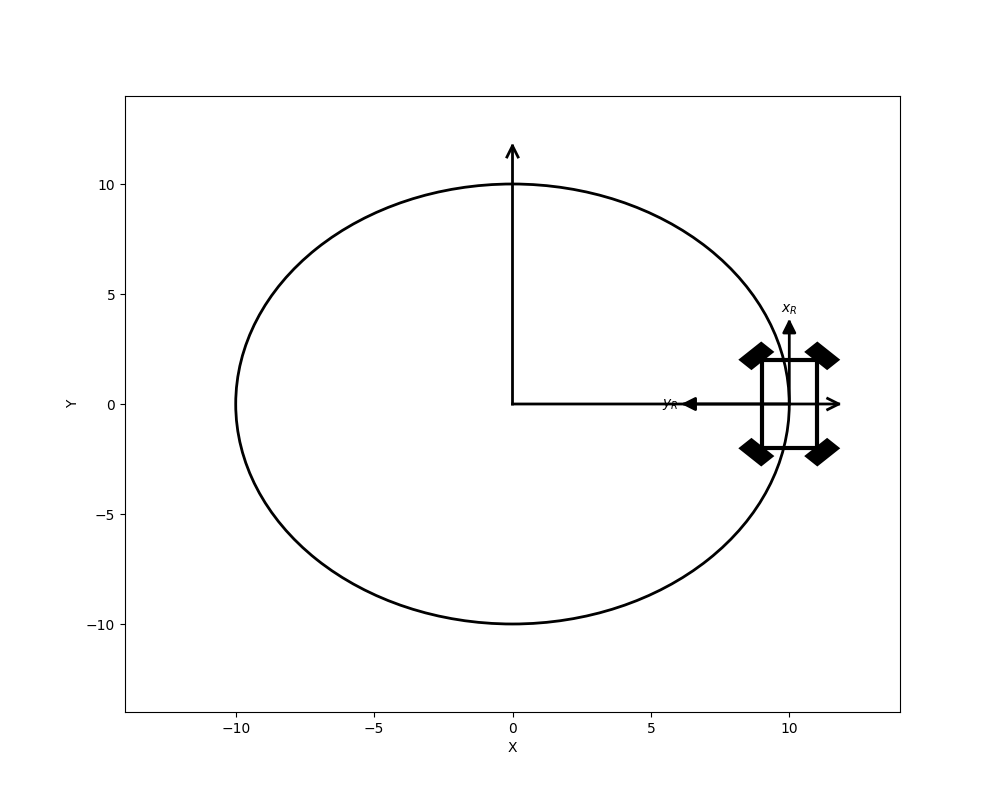

In [1]:
%matplotlib widget
from mobile_robot_omni_wheel import *
fig = plt.figure(figsize=(10, 8))


anim = omni_rob_animation(fig, 10, rob=True, wheels=False)
#anim.save('omni_wheel_circle.gif')